# Introduction to ROOT

In this notebook, we explore some of the more basic features of root and get familiar with the syntax of implementing them in PyROOT

### Lets break down some of ROOTs most basic features. We can start with:
* Canvases --- (TCanvas)
* Histograms - (THn)
* Graphs ----- (TGraph)
* Functions -- (TFn)

---

In [1]:
import ROOT as r #standard python import

Welcome to JupyROOT 6.20/04


In [2]:
#we can use default python data types here
i = 2
j = 6.8

print(i, j)

2 6.8


In [3]:
#lets create a 1D histogram and fill it with some data
#documentation: https://root.cern.ch/doc/v608/classTH1.html 
nBins = 100
xLow = 0
xHigh = 1
h = r.TH1D( # The 'D' here means that each bin contains a double. 
    "h",    # Name of the histogram
    "Example Histogram with a Fancy Title using Latex: #omega/n#pi [#mus]; X-Axis Title; Y-Axis Title", # Title 
    nBins,       # Number of bins (there is also an under/overflow bin)
    xLow, xHigh) # Range of the lowest bin edge to the highest bin edge

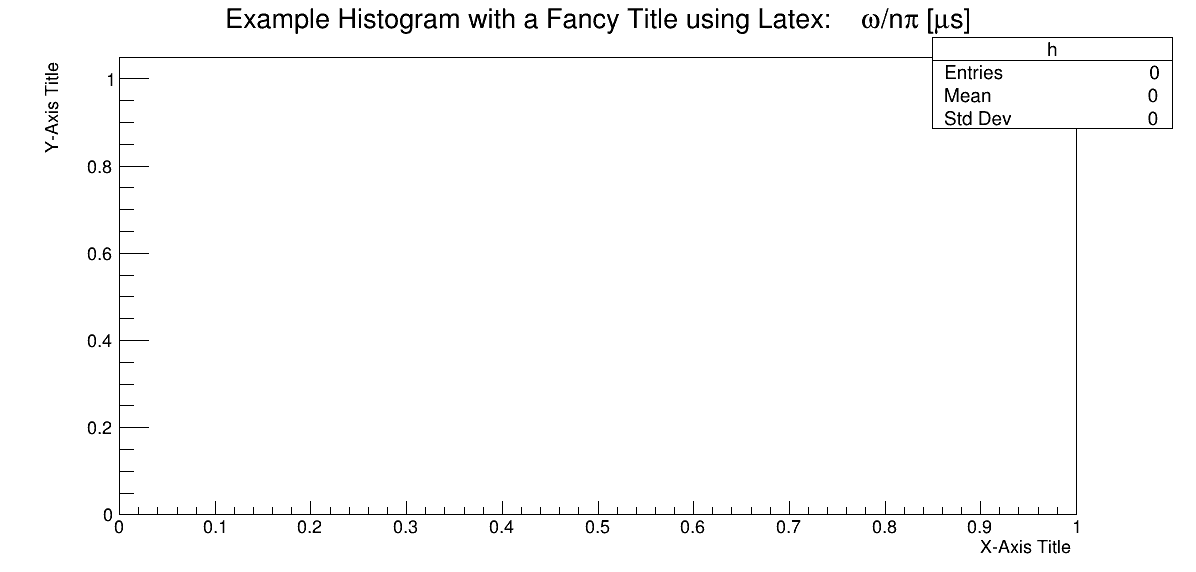

In [4]:
# now we have a histogram, lets draw it on a canvas
c = r.TCanvas()                             # default parameters are fine, or...
c = r.TCanvas("c","First Canvas", 1200,600) # we can specify a name/dimensions

h.Draw() 

c.Draw()

### Nice, we have an empty histogram, now lets fill it with some data

In [5]:
#use numpy to generate some random data for example
import numpy as np
randomdata = np.random.random(1000)
weight = 1
for x in randomdata:
    h.Fill(x, weight) # we can fill the histogram with a different weight if we wish. If we leave off this argument, the default is 1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


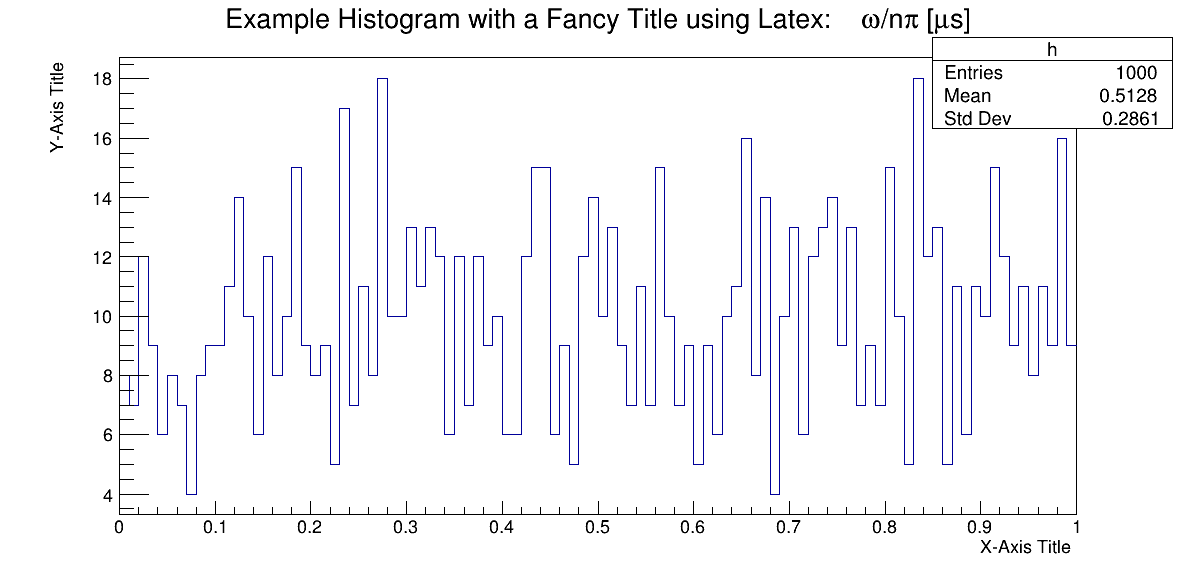

In [6]:
# lets see how our histogram has changed
c = r.TCanvas("c","First Canvas", 1200,600) # we can specify a name/dimensions

h.Draw() 

c.Draw()

### Maybe we can make this look a little better....

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


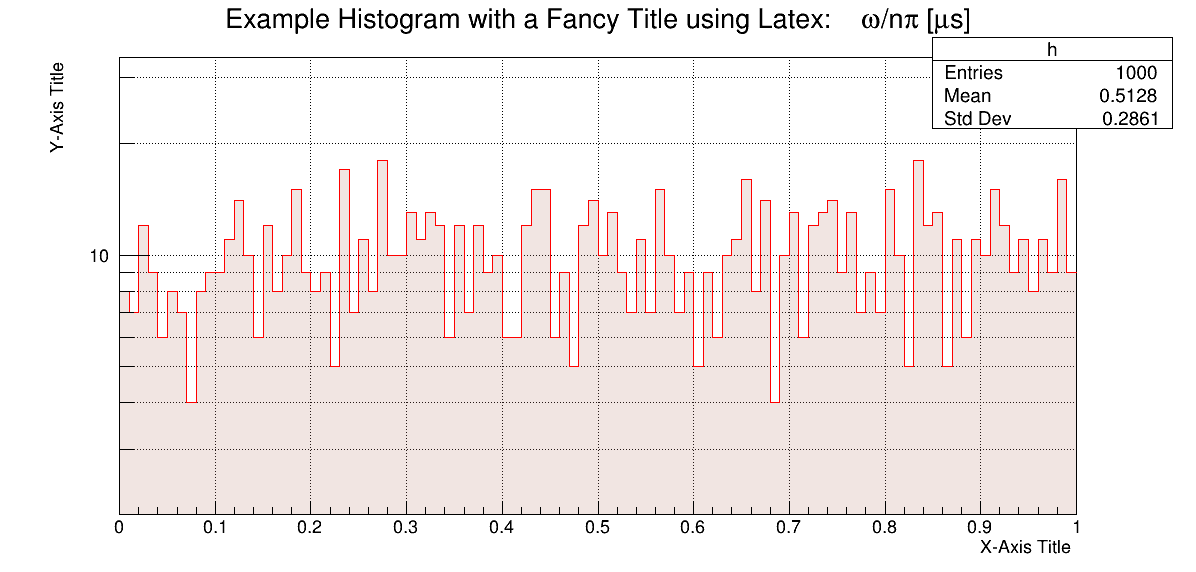

In [7]:
# lets see how our histogram has changed
c = r.TCanvas("c","First Canvas", 1200,600) # we can specify a name/dimensions

h.SetLineColor(2) # see: https://root.cern.ch/doc/master/classTColor.html
h.SetFillColorAlpha(45,0.2)
h.Draw() 

c.SetGrid() # we can make the values a little easier to read with a grid
c.SetLogy() # or maybe we think this would look better on a log scale
c.Draw()

### What if our data is more than one dimensional? Well theres a histogram for that too

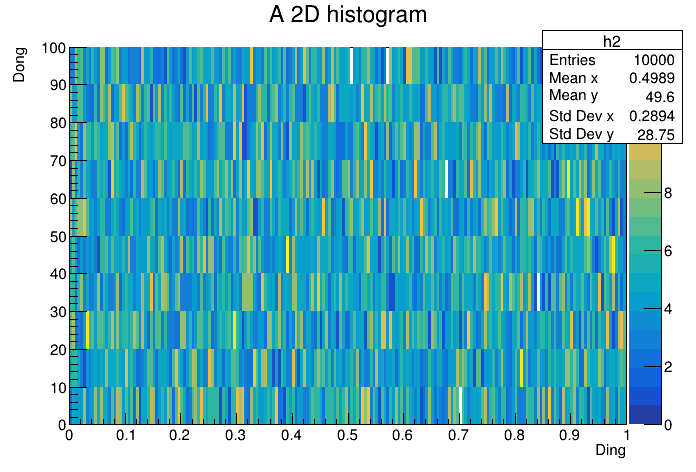

In [8]:
h2 = r.TH2D("h2", "A 2D histogram; Ding; Dong", 
           200, 0, 1,  #x-axis
           10, 0, 100) #y-axis, the number of bins and the ranges can be different for each of the axes

randomdata_x = np.random.random(10000)
randomdata_y = np.random.random(10000)

for (x,y) in zip(randomdata_x,randomdata_y):
    h2.Fill(x,y*100)
    
c = r.TCanvas()
h2.Draw("colz") #colz creates a colorscale
c.Draw()

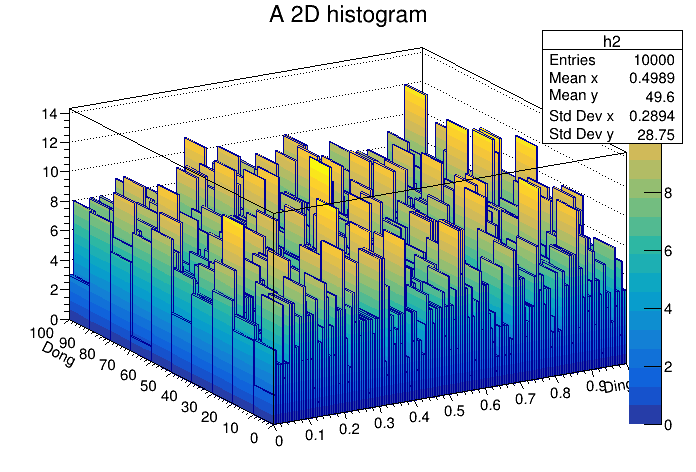

In [9]:
c = r.TCanvas()
h2.Draw("lego2z") #lego creates a 3d plot
c.Draw()

---

# TGraph


Now that we understand how histograms work, we can quickly mention unbinned data formats. These are less useful to us because they quickly become memory intensive, but are important to note.

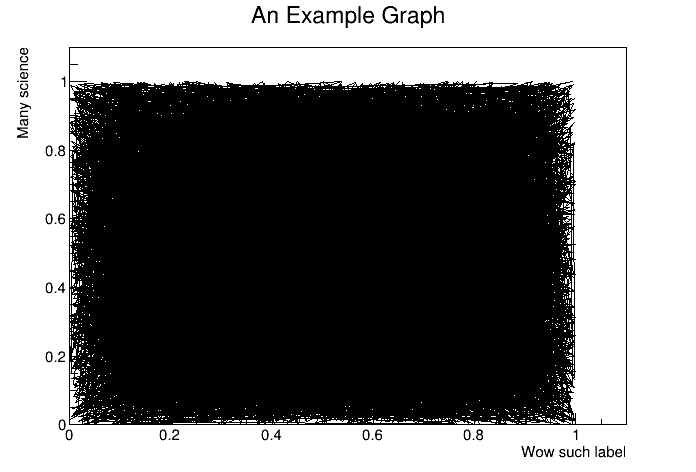

In [10]:
gr = r.TGraph() # no need to initialize the bins, there aren't any
gr.SetTitle("An Example Graph; Wow such label; Many science")

for i in range(len(randomdata_x)):
    gr.SetPoint(i, randomdata_x[i], randomdata_y[i]) #each point has an index as well as the data value

c = r.TCanvas()
gr.Draw()
c.Draw()

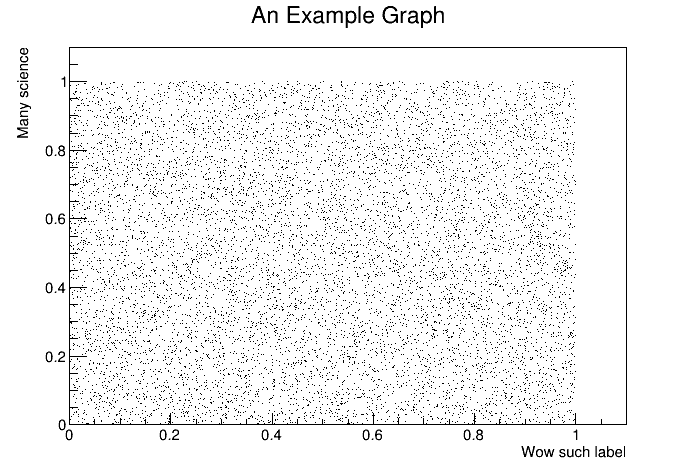

In [11]:
#lets just draw the axes (a) and points (p)

c = r.TCanvas()
gr.Draw("ap")
c.Draw()

---

# Functions

Now lets create a histogram with gaussian data to show off the power of root fits`

In [12]:
h = r.TH1D("h","Gaussian Fit Example", 100,0,100)
for i in range(10000):
    h.Fill( np.random.normal(30, 5) )

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


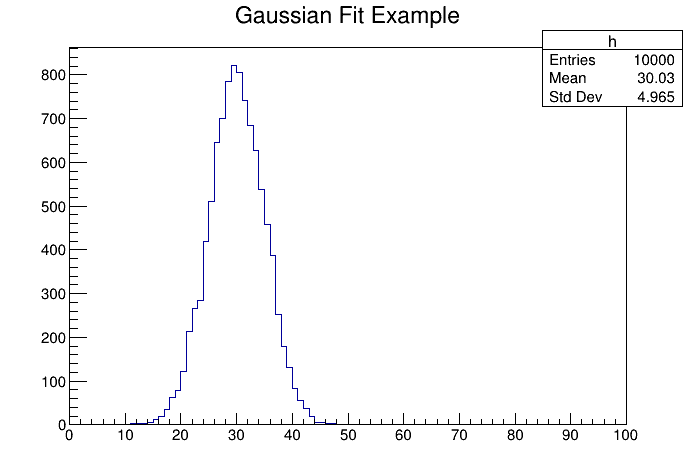

In [13]:
c = r.TCanvas()
h.Draw()
c.Draw()

### Now lets create a gaussian function to fit this using the built in TMath 'gaus' function

In [14]:
func = r.TF1("func", #name of the function
             "gaus", #a string detailing what the function is. This is parsed by ROOT
             0,100   #the range in which the function is defined.
            )

 FCN=38.3005 FROM MIGRAD    STATUS=CONVERGED      56 CALLS          57 TOTAL
                     EDM=6.83952e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.04458e+02   9.84981e+00   2.46687e-02  -1.33952e-05
   2  Mean         3.00459e+01   4.95765e-02   1.51596e-04  -4.54830e-05
   3  Sigma        4.94048e+00   3.48060e-02   5.85734e-06  -5.16352e-02


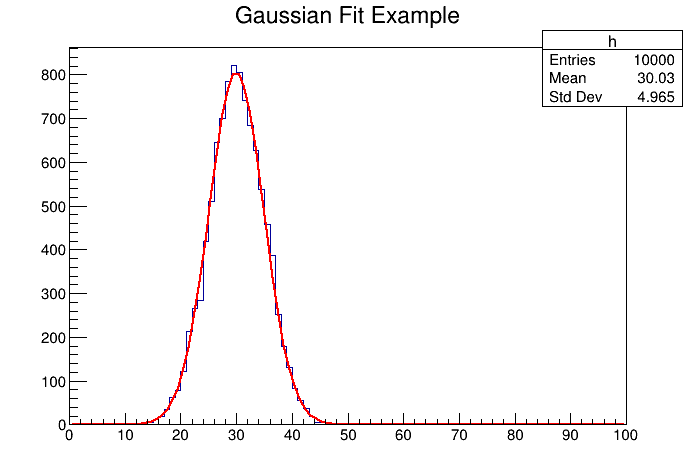

In [15]:
#lets fit the histogram
c = r.TCanvas()
h.Fit(func)
h.Draw()
c.Draw()

### We can also use a TF1 to generate random data using the FillRandom function, this will allow us to show off a more complex fit

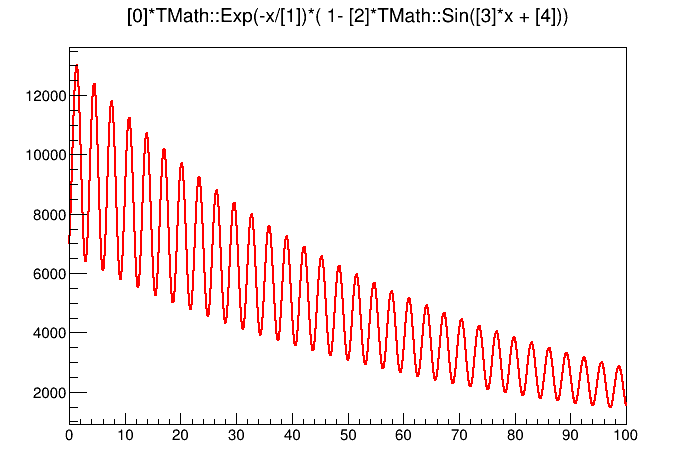

In [31]:
# func2 = r.TF1("func2","[0]+[1]*x+[2]*TMath::Sin([3]*x + [4])",0,100)
func2 = r.TF1("func2","[0]*TMath::Exp(-x/[1])*( 1- [2]*TMath::Sin([3]*x + [4]))",0,100)
func2.SetParameters(10000,64.4,0.33,2,2)
func2.SetNpx(5000)
c = r.TCanvas()
func2.Draw()
c.Draw()

In [32]:
h = r.TH1I("h","Example Integer Histogram with Fancy Fit", 1000,0,100)
h.FillRandom("func2", 1000000)

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


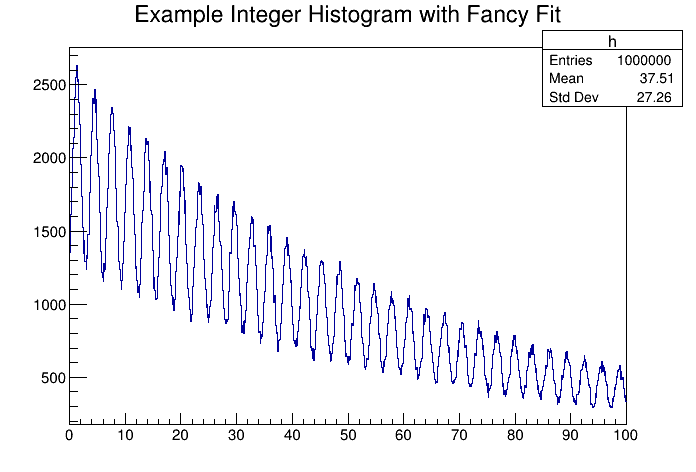

In [33]:
c = r.TCanvas()
h.Draw()
c.Draw()

 FCN=56622.9 FROM MIGRAD    STATUS=CONVERGED     869 CALLS         870 TOTAL
                     EDM=2.35937e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.86125e+03   3.28086e+00   2.22655e-01  -1.27191e-04
   2  p1           6.42089e+01   1.56863e-01   1.06542e-02  -1.18388e-03
   3  p2          -8.17705e-03   1.45803e-03   1.69332e-04   2.87501e-01
   4  p3          -7.71871e-01   5.65348e-03   5.37636e-04  -3.48532e-03
   5  p4           2.05437e+01   2.17776e-01   2.06729e-02   1.96022e-03


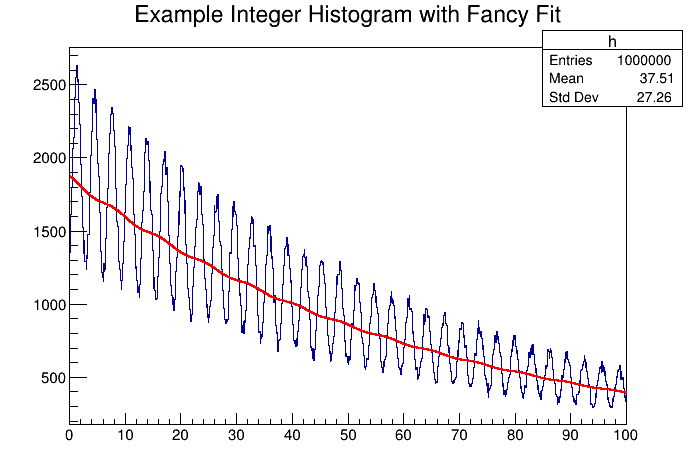

In [34]:
c = r.TCanvas()
h.Fit(func2)
h.Draw()
c.Draw()

### Why didn't that work? Well maybe we need to use some fitting options...

 FCN=56622.9 FROM MINOS     STATUS=SUCCESSFUL     64 CALLS         450 TOTAL
                     EDM=1.52853e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.86125e+03   3.27991e+00   1.84919e-03  -8.33860e-05
   2  p1           6.42089e+01   1.56819e-01  -6.84743e-05  -8.29803e-04
   3  p2          -8.17726e-03   1.45776e-03   3.24108e-06   2.97759e-02
   4  p3          -7.71872e-01   5.63441e-03   4.48305e-05   3.11537e-01
   5  p4           2.05437e+01   2.17042e-01   2.17042e-01  -3.72181e-03


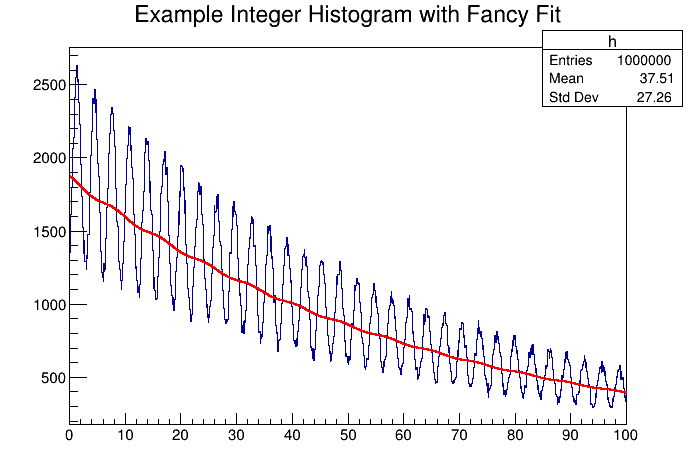

In [35]:
c = r.TCanvas()
h.Fit(func2,"REMB")
h.Draw()
c.Draw()

### Or perhaps just a better initial guess?

 FCN=1020.61 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         394 TOTAL
                     EDM=5.67799e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.96655e+03   3.34701e+00  -2.96090e-03   8.19913e-07
   2  p1           6.42654e+01   1.51535e-01   4.85796e-05   1.69419e-05
   3  p2           3.29996e-01   1.36208e-03  -2.86238e-06  -4.11199e-04
   4  p3           1.99975e+00   1.55534e-04   4.18161e-08   1.01216e-02
   5  p4           2.01685e+00   7.16524e-03   7.16524e-03   1.38155e-03


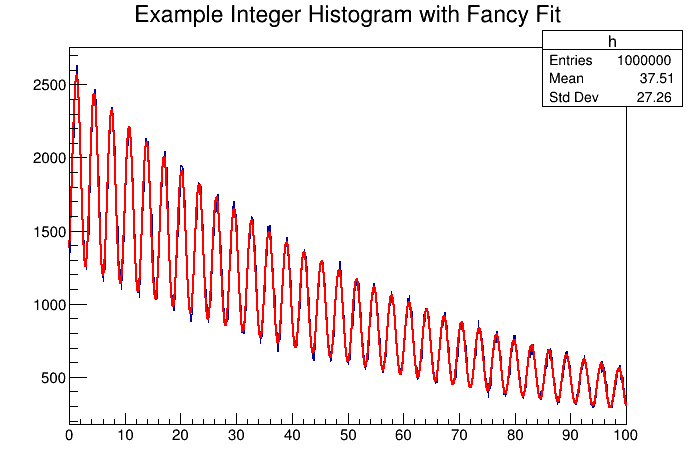

In [42]:
c = r.TCanvas()
func2.SetParameters(2000,100,0.33,2,2)
h.Fit(func2,"REMB")
h.Draw()
c.Draw()

---

### Now that we have some basics under our belt, lets look at some real data!